In [271]:
import pandas as pd
import numpy as np

In [272]:
fips = '36061'

In [273]:
# Cleaning and retrieving mobility data

mob = pd.read_csv('applemobilitydata/applemobilitycleaned_county.csv')
mob = mob.loc[mob['fips'] == float(fips)]
cols = [0,2,3]
mob = mob.drop(mob.columns[cols], axis=1)
mob

,fips,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,...,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27
868,36061.0,100.0,94.86,99.23,103.35,122.96,115.13,107.98,87.73,90.64,...,30.37,31.91,32.87,34.93,39.5,30.65,33.82,32.03,36.65,37.29


In [274]:
# Cleaning and retrieving symptoms data

sym = pd.read_csv('covidsymptoms/covidsymptoms_google.csv')
sym = sym.loc[sym['fips'] == float(fips)]
cols = [0,2,3]
sym = sym.drop(sym.columns[cols], axis=1)
sym

,fips,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,...,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13
30,36061,23.942948,22.669515,21.310849,19.385167,17.659743,18.039532,18.78854,20.028444,19.952245,...,12.369208,11.85822,11.981621,11.122302,10.857461,11.373938,11.499215,10.729665,10.321903,10.541343


In [275]:
# Cleaning and retrieving demographics data

dem = pd.read_csv('countydemographics/county_demographics.csv')
dem = dem.loc[dem['fips'] == float(fips)]
cols = [0,2,3,4,5,6,9,10,11]
dem = dem.drop(dem.columns[cols], axis=1)
dem

,fips,median_age,population,Density per square mile of land area
1857,36061,37.3,1632480,69468.4


In [276]:
# Cleaning and retrieving testing rate data

tes = pd.read_csv('testingrates/testing_rates_county.csv')
tes = tes.loc[tes['fips'] == float(fips)]
cols = [0]
tes = tes.drop(tes.columns[cols], axis=1)
tes

,fips,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29
1856,36061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.019582,0.019074,0.018617,0.018129,0.017697,0.017354,0.017065,0.016764,0.01626,0.015763


In [277]:
# Cleaning and retrieving case data

cas = pd.read_csv('covidstats/confirmed_cases_county.csv')
cas = cas.loc[cas['fips'] == float(fips)]
cols = [0]
cas = cas.drop(cas.columns[cols], axis=1)
cas

In [278]:
newDf = pd.concat([mob,sym,tes])
newDf = newDf.reset_index()
newDf = newDf.drop(newDf.columns[[0,1]], axis=1)

cas = cas.reset_index()
cas = cas.drop(cas.columns[[0,1]], axis=1)

In [279]:
newDf = newDf.T
cas = cas.T
newDf = newDf.fillna(0)
cas = cas.fillna(0)

In [280]:
X = newDf[[0,1,2]]
y = cas
X = X[X.index.isin(y.index)]

In [281]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [282]:
regressor = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [283]:
model = regressor.fit(X_train,y_train)

In [284]:
y_pred = regressor.predict(X_test)

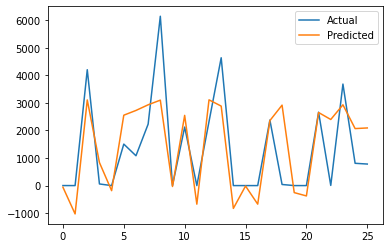

In [286]:
df = pd.DataFrame({'Actual': y_test.to_numpy().flatten(), 'Predicted': y_pred.flatten()})
df.plot()